In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
weight_path = '/data1/guilimin/abide/subtype/sc7/srs_maybe_ref_full_pruned/sbt_weights_net_6.csv'
model_path = '/data1/guilimin/abide/pheno/sc7/model_srs_maybe_sc7_ref_full_pruned.csv'

In [4]:
weight = pd.read_csv(weight_path)
weight.rename(columns={' ':'SUB_ID'}, inplace=True)
weight.columns = weight.columns.str.strip(' ')
weight.SUB_ID = weight.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)

model = pd.read_csv(model_path)
merged = pd.merge(model, weight, on='SUB_ID', how='inner')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


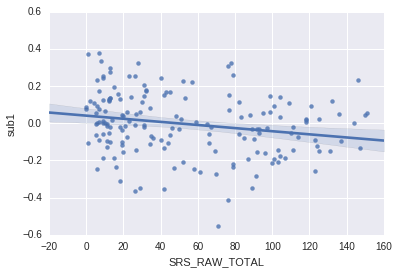

In [5]:
sb.regplot('SRS_RAW_TOTAL', 'sub1', data=merged)

In [8]:
y = merged.sub1.as_matrix()
x = merged[['SRS_RAW_TOTAL']]
x['Intercept'] = np.ones(x.shape[0])

m = sm.OLS(y, x)
results = m.fit()

eff = np.sqrt(results.rsquared)
var = results.rsquared
pval = results.pvalues['SRS_RAW_TOTAL']

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [9]:
eff

0.21466683312070264

In [10]:
var

0.046081849242071593

In [11]:
pval

0.005201575017059229

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     8.019
Date:                Mon, 27 Jun 2016   Prob (F-statistic):            0.00520
Time:                        18:27:01   Log-Likelihood:                 66.781
No. Observations:                 168   AIC:                            -129.6
Df Residuals:                     166   BIC:                            -123.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
SRS_RAW_TOTAL    -0.0008      0.000     -2.832